# Feature Engineering (Part 1)

During this moment, the first feature that we are going to enginneer is the *rating classification*. As this is going to be the target variable (y or dependent variable) that we would like to predict, in other words, the sentiment classification, we will use the technique of *label encoding* to convert the rating from 1 to 10 given by the reviews. As this represents an ordinal categorical data type, the *label encoding* is a good technique for our multi-classification problem. But, before applying this technique, let's understand what the rating of the reviews represent.

### Step 4: Encoding the *rating* classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
nltk.download(['punkt', 'wordnet'])
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer            

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafaelaqueiroz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rafaelaqueiroz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load the dataset
# medication_reviews_dataset_cleaned = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/Sentiment-Analysis-of-Medication-Reviews-Project/medication_reviews_dataset_to_train.csv', sep=',')
medication_reviews_dataset_cleaned = pd.read_csv('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/medication_reviews_dataset_to_train.csv', sep=',')
medication_reviews_dataset_cleaned.head(2)

,drugName,condition,rating,date,usefulCount,year,review_word_lemm,polarity,rating_classification
0,Valsartan,Left Ventricular Dysfunction,9.0,2012-05-20,27,2012,"['no', 'side', 'effect', 'take', 'combination'...",0.000000,2
1,Guanfacine,ADHD,8.0,2010-04-27,192,2010,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",0.188021,2


In [4]:
# Calculate the total number of ratings
total_medication_reviews_ratings = len(medication_reviews_dataset_cleaned['rating'])

# Create a dictionary to store the count of ratings in each category
rating_medication_reviews_count = {i: 0 for i in range(11)}

# Iterate through the ratings and count how many fall in each category
for rating in medication_reviews_dataset_cleaned['rating']:
    rating_medication_reviews_count[rating] += 1

# Calculate the percentage of ratings in each category and store it in a dictionary
rating_percentages = {rating: (count / total_medication_reviews_ratings) * 100 for rating, count in rating_medication_reviews_count.items()}

# Print out the percentage of ratings in each category
for rating, percentage in rating_percentages.items():
    print(f'Rating {rating}: {percentage:.2f}%')

Rating 0: 0.00%
Rating 1: 13.44%
Rating 2: 4.27%
Rating 3: 3.99%
Rating 4: 3.08%
Rating 5: 4.97%
Rating 6: 3.92%
Rating 7: 5.90%
Rating 8: 11.75%
Rating 9: 17.04%
Rating 10: 31.63%


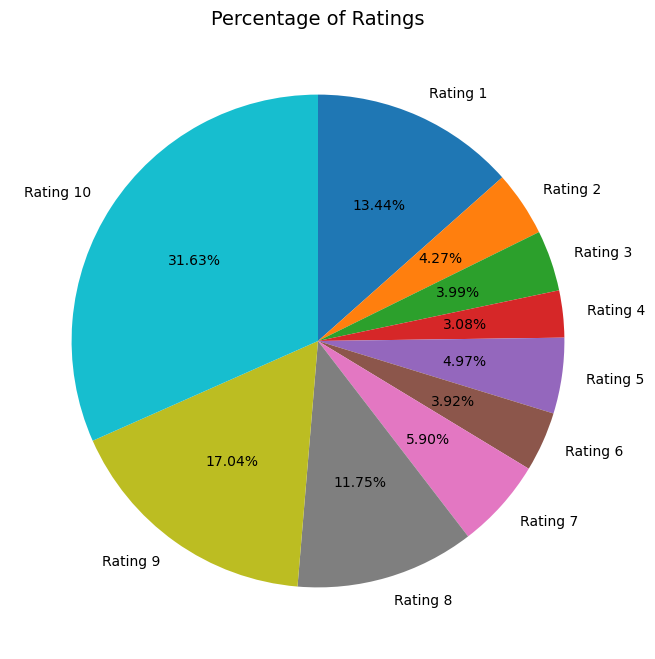

In [5]:
# Let's plot these results

# Define the rating labels and percentages
labels = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5', 'Rating 6', 'Rating 7', 'Rating 8', 'Rating 9', 'Rating 10']
percentages = [13.44, 4.27, 3.99, 3.08, 4.97, 3.92, 5.90, 11.75, 17.04, 31.63]

# Create a pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(percentages, labels=labels, autopct='%1.2f%%', startangle=90, counterclock=False)

# Add a title to the chart
ax.set_title('Percentage of Ratings', fontsize=14)
plt.show()

# Show the chart
plt.show()

From this pie chart, it is noted that almost the half of the percentage of the reviews from the dataset have given a rating concentrated to the positive side. But this led us to another question: where these ratings spreadout throughout the years or most of the positive ones were given during a specific time? What about the negative ones? Let's see if we can find out.

In [6]:
# Let's plot the percentage of the ratings of the reviews given by year
ratings_by_year = medication_reviews_dataset_cleaned.groupby(['year', 'rating']).size().reset_index(name='count')
ratings_by_year['percentage'] = 100 * ratings_by_year['count'] / ratings_by_year.groupby('year')['count'].transform('sum')

# Create the histogram
fig = px.histogram(ratings_by_year, x='year', y='percentage', color='rating', nbins=10, template='plotly_white', barmode='group')
fig.update_xaxes(categoryorder='category descending', title='Year')
fig.update_yaxes(title='Percentage of ratings')
fig.update_layout(title='Percentage of the ratings from medication reviews given by year')

fig.show()

It looks like from this graph that the ratings of 10, 9 and 8 were similarlly given during these almost past years (follow a constant), but the negative ones started to have a high percentage from 2015 to 2017.

In [7]:
# Let's analyze some of the reviews and their ratings before creating a classification
medication_reviews_dataset_cleaned_reviews_selected_1 = [medication_reviews_dataset_cleaned['rating'] == 1.0]
medication_reviews_dataset_cleaned_reviews_selected_1 

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 112324     True
 112325    False
 112326    False
 112327    False
 112328    False
 Name: rating, Length: 112329, dtype: bool]

In [8]:
# Import libraries to check the polarity of the reviews
from textblob import TextBlob

# Iterate over each row and extract the reviews
for index, row in medication_reviews_dataset_cleaned.iterrows():
    review_text = row['review_word_lemm']
    # Analyze the polarity of the reviews using TextBlob
    polarity = TextBlob(review_text).sentiment.polarity
    # Add the polarity score to a new column in the DataFrame
    medication_reviews_dataset_cleaned.at[index, 'polarity'] = polarity

In [9]:
medication_reviews_dataset_cleaned.head(25)

,drugName,condition,rating,date,usefulCount,year,review_word_lemm,polarity,rating_classification
0,Valsartan,Left Ventricular Dysfunction,9.0,2012-05-20,27,2012,"['no', 'side', 'effect', 'take', 'combination'...",0.000000,2
1,Guanfacine,ADHD,8.0,2010-04-27,192,2010,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",0.188021,2
2,Lybrel,Birth Control,5.0,2009-12-14,17,2009,"['used', 'take', 'another', 'oral', 'contracep...",0.113636,1
3,Ortho Evra,Birth Control,8.0,2015-11-03,10,2015,"['first', 'time', 'using', 'form', 'birth', 'c...",0.262500,2
4,Buprenorphine / naloxone,Opiate Dependence,9.0,2016-11-27,37,2016,"['suboxone', 'completely', 'turned', 'life', '...",0.163333,2
5,Cialis,Benign Prostatic Hyperplasia,2.0,2015-11-28,43,2015,"['nd', 'day', 'mg', 'started', 'work', 'rock',...",0.014583,0
6,Levonorgestrel,Emergency Contraception,1.0,2017-03-07,5,2017,"['pulled', 'cummed', 'bit', 'took', 'plan', 'b...",0.111111,0
7,Aripiprazole,Bipolar Disorde,10.0,2015-03-14,32,2015,"['abilify', 'changed', 'life', 'hope', 'zoloft...",0.079808,2
8,Keppra,Epilepsy,1.0,2016-08-09,11,2016,"['nothing', 'problem', 'keppera', 'constant', ...",0.200000,0
9,Ethinyl estradiol / levonorgestrel,Birth Control,8.0,2016-12-08,1,2016,"['pill', 'many', 'year', 'doctor', 'changed', ...",0.051111,2


In [10]:
# Group the DataFrame by rating and calculate summary statistics
grouped = medication_reviews_dataset_cleaned.groupby('rating').agg({'review_word_lemm': 'count', 'polarity': 'mean'})

# Rename the columns for clarity
grouped = grouped.rename(columns={'review_word_lemm': 'count', 'polarity': 'average polarity'})

# Sort the DataFrame by rating in ascending order
grouped = grouped.sort_values('rating', ascending=True)

# Display the grouped DataFrame
print(grouped)

        count  average polarity
rating                         
1.0     15096         -0.099693
2.0      4802         -0.058185
3.0      4482         -0.029656
4.0      3459         -0.010412
5.0      5585         -0.001419
6.0      4408          0.030124
7.0      6622          0.053198
8.0     13198          0.083978
9.0     19146          0.108735
10.0    35531          0.132563


With that, it is important to point out some notes:

1. There are no reviews rated with 0, but there is a significative percentage of total reviews rated with 1;
2. The reviews rated with 2, 3, 5 and 7 have a similar count;
3. The polarity of the reviews rated with 1, 2 and 3 are negative, especially the reviews with rating 1 which are closer to -1;
4. The reviews with a rate of 4 and 6 are the ones with a lower count of total reviews; 
5. Most of the reviews are rated between 1, 8, 9 and 10 which most likely indicate a more positive skew (or inclination) of the dataset when considering these 3 last ratings given mostly to positive experiences. So, in other words, this can be significative to mention as most of them follow a "positive" sentiment about the use of some medications;
6. The reviews with rating 8, 9 and 10 are closer to 1, thus indicate a positive polarity of the reviewers towards those medications;
7. The total reviews under rate 1 have almost the same percentage of the ones under the rate 9. Therefore, both these reviews classification might balance the total of the count of the dataset.

As the rating classification ranges from 1 to 10, we will apply, for now, the following classification (which can be revisited aftwerwards) based on our analysis of the medication reviews: 

* 1-4: negative,
* 5-6: in - between, as have points positive and negative showed in most of the reviews (we will call "neutral" for now),
* 7-10: positive.

Also, we are going to define those bins with labels and apply the *label encoder* to create a new rating classification column in the dataframe.

In [11]:
# Import library to label encode the rating column
from sklearn.preprocessing import LabelEncoder

# Define the bin edges and labels (0 = 'negative', 1 = 'neutral', 2 = 'positive')
bin_edges = [0, 4, 6, 10]  # Ratings 1-4 are negative, 5-6 are neutral, 7-10 are positive
bin_labels = ['negative', 'neutral', 'positive'] # The rating_classification column should now only have 0, 1, or 2 values

# Use cut to bin the "rating" column and create the new column called "rating_classification"
medication_reviews_dataset_cleaned['rating_classification'] = pd.cut(medication_reviews_dataset_cleaned['rating'], bins=bin_edges, labels=bin_labels)

# Instantiate LabelEncoder and fit_transform the new column
le = LabelEncoder()
medication_reviews_dataset_cleaned['rating_classification'] = le.fit_transform(medication_reviews_dataset_cleaned['rating_classification'])
medication_reviews_dataset_cleaned.head(30)

,drugName,condition,rating,date,usefulCount,year,review_word_lemm,polarity,rating_classification
0,Valsartan,Left Ventricular Dysfunction,9.0,2012-05-20,27,2012,"['no', 'side', 'effect', 'take', 'combination'...",0.000000,2
1,Guanfacine,ADHD,8.0,2010-04-27,192,2010,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",0.188021,2
2,Lybrel,Birth Control,5.0,2009-12-14,17,2009,"['used', 'take', 'another', 'oral', 'contracep...",0.113636,1
3,Ortho Evra,Birth Control,8.0,2015-11-03,10,2015,"['first', 'time', 'using', 'form', 'birth', 'c...",0.262500,2
4,Buprenorphine / naloxone,Opiate Dependence,9.0,2016-11-27,37,2016,"['suboxone', 'completely', 'turned', 'life', '...",0.163333,2
5,Cialis,Benign Prostatic Hyperplasia,2.0,2015-11-28,43,2015,"['nd', 'day', 'mg', 'started', 'work', 'rock',...",0.014583,0
6,Levonorgestrel,Emergency Contraception,1.0,2017-03-07,5,2017,"['pulled', 'cummed', 'bit', 'took', 'plan', 'b...",0.111111,0
7,Aripiprazole,Bipolar Disorde,10.0,2015-03-14,32,2015,"['abilify', 'changed', 'life', 'hope', 'zoloft...",0.079808,2
8,Keppra,Epilepsy,1.0,2016-08-09,11,2016,"['nothing', 'problem', 'keppera', 'constant', ...",0.200000,0
9,Ethinyl estradiol / levonorgestrel,Birth Control,8.0,2016-12-08,1,2016,"['pill', 'many', 'year', 'doctor', 'changed', ...",0.051111,2


In [13]:
# Create a new dataframe with only 2 columns: "review_word_lemm" and "rating_classification"
new_medication_reviews_df = medication_reviews_dataset_cleaned.loc[:, ['review_word_lemm', 'rating_classification']]
new_medication_reviews_df.head(15)

,review_word_lemm,rating_classification
0,"['no', 'side', 'effect', 'take', 'combination'...",2
1,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",2
2,"['used', 'take', 'another', 'oral', 'contracep...",1
3,"['first', 'time', 'using', 'form', 'birth', 'c...",2
4,"['suboxone', 'completely', 'turned', 'life', '...",2
5,"['nd', 'day', 'mg', 'started', 'work', 'rock',...",0
6,"['pulled', 'cummed', 'bit', 'took', 'plan', 'b...",0
7,"['abilify', 'changed', 'life', 'hope', 'zoloft...",2
8,"['nothing', 'problem', 'keppera', 'constant', ...",0
9,"['pill', 'many', 'year', 'doctor', 'changed', ...",2


In [15]:
# Let's calculate again the total number of ratings after label encoding the reviews
total_medication_reviews_encoded_ratings = len(medication_reviews_dataset_cleaned['rating_classification'])

# Create a dictionary to store the count of ratings in each category
rating_medication_reviews_encoded_count = {i: 0 for i in range(3)}

# Iterate through the ratings and count how many fall in each category
for rating in new_medication_reviews_df['rating_classification']:
    rating_medication_reviews_encoded_count[rating] += 1

# Calculate the percentage of ratings in each category and store it in a dictionary
rating_reviews_encoded_percentages = {rating: (count / total_medication_reviews_encoded_ratings) * 100 for rating, count in rating_medication_reviews_encoded_count.items()}

# Print out the percentage of ratings in each category
for rating, percentage in rating_reviews_encoded_percentages.items():
    print(f'Rating {rating}: {percentage:.2f}%')

Rating 0: 24.78%
Rating 1: 8.90%
Rating 2: 66.32%


As our dataset is still not balanced (and heavily skewed to positive reviews), we are going to apply some "data augmentation" techniques in order to generate more neutral and negative sentiments.

In [32]:
# !pip install googletrans==4.0.0-rc1

In [33]:
# Applying translation of our claases 0 and 1
from googletrans import Translator
from httpx import Timeout

# Create a translator object
timeout = Timeout(timeout=60)
translator = Translator(timeout=timeout)
translator.raise_exception = True  # enable raising exceptions

try:
    translation = translator.translate("Hello", dest="es")
except Exception as e:
    print(f"Translation failed: {e}")

# Separate the data into subsets based on the rating
df_rating0 = medication_reviews_dataset_cleaned[medication_reviews_dataset_cleaned['rating_classification'] == 0]
df_rating1 = medication_reviews_dataset_cleaned[medication_reviews_dataset_cleaned['rating_classification'] == 1]
df_rating2 = medication_reviews_dataset_cleaned[medication_reviews_dataset_cleaned['rating_classification'] == 2]

# Augment the subsets containing rating 0 and rating 1
augmented_reviews = []
for df_rating in [df_rating0, df_rating1]:
    reviews = df_rating['review_word_lemm'].tolist()
    for review in reviews:
        for lang in ['es', 'fr', 'de', 'ja']:
            try:
                translated_review = translator.translate(review, dest=lang).text
                backtranslated_review = translator.translate(translated_review, dest='en').text
                augmented_reviews.append(backtranslated_review)
            except Exception as e:
                print(f"Translation failed: {e}")

# Add the augmented reviews to the original dataframes with the corresponding labels
augmented_labels = np.zeros(len(augmented_reviews), dtype=int)
df_augmented0 = pd.DataFrame({'review_word_lemm': augmented_reviews, 'rating': augmented_labels})
df_augmented0['rating'] = df_augmented0['rating'].astype('category')
df_augmented1 = df_augmented0.copy()
df_augmented1['rating'] = 1

# Concatenate the original and augmented dataframes
df_concatenated = pd.concat([df_rating0, df_rating1, df_augmented0, df_augmented1, df_rating2], ignore_index=True)

Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Translator' object has no attribute 'raise_Exception'
Translation failed: 'Tran

In [12]:
# Save this new dataframe in a .csv file to be used in the modeling
medication_reviews_dataset_to_train = medication_reviews_dataset_cleaned.to_csv('medication_reviews_dataset_to_train.csv', index=False)

#### 4.1 Creating the *X* and *y* variables from our trainning set

In [14]:
# Our independent variable (X) is going to be the "review_word_lemm" variable
X = new_medication_reviews_df.review_word_lemm
X

0         ['no', 'side', 'effect', 'take', 'combination'...
1         ['son', 'halfway', 'fourth', 'week', 'intuniv'...
2         ['used', 'take', 'another', 'oral', 'contracep...
3         ['first', 'time', 'using', 'form', 'birth', 'c...
4         ['suboxone', 'completely', 'turned', 'life', '...
                                ...                        
112324    ['mg', 'seems', 'work', 'every', 'nd', 'day', ...
112325    ['tekturna', 'day', 'effect', 'immediate', 'al...
112326    ['wrote', 'first', 'report', 'midoctober', 'no...
112327    ['ive', 'thyroid', 'medication', 'year', 'spen...
112328    ['ive', 'chronic', 'constipation', 'adult', 'l...
Name: review_word_lemm, Length: 112329, dtype: object

In [15]:
X.shape

(112329,)

In [16]:
type(X)

pandas.core.series.Series

In [17]:
# Our target or dependent variable (y) is going to be the 'rating_classification' variable
y = new_medication_reviews_df.rating_classification
y

0         2
1         2
2         1
3         2
4         2
         ..
112324    0
112325    2
112326    2
112327    2
112328    2
Name: rating_classification, Length: 112329, dtype: int64

In [18]:
y.shape

(112329,)

In [19]:
type(y)

pandas.core.series.Series